Peterside Hospital - Heart Disease Case Study

In [27]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Preprocessing library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import Classifier libraries - ML Algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Load dataset
df = pd.read_csv("..\Heart_Disease\Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Features in the dataset and meaning
- age - age in years
- sex - (1- Male; 0 - Female)
- chest pain type (cp) {1:typical angina, 2:atypical angina, 3:Non-anginal pain, 4:asymptomatic}
- resting blood pressure (trestbps) (in mm Hg on admission to the hospital)
- serum cholesterol (chol) (in mg/dl)
- fasting blood sugar (fbs) (fasting blood sugar > 120 mg/dl) - (1-true; 0-false)
- resting electrocardiographic results (restecg)
- maximum heart rate achieved (thalach) 
- exercise-induced angina (exang) {1-Yes; 0-No}
- ST depression induced by exercise relative to rest (oldpeak)
- the slope of the peak exercise ST segment (slope)
- number of major vessels colored by flourosopy (ca)
- thalassemia (thal) {3-Normal; 6-fixed defect; 7-reversable defect}
- target - have disease or not {1-Yes; 0-No}

In [29]:
# Rename columns for better understanding
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
           'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
# Data verification - Data type, number of features and rows, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

- No missing values

In [31]:
# Statistcial Analysis of the Data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

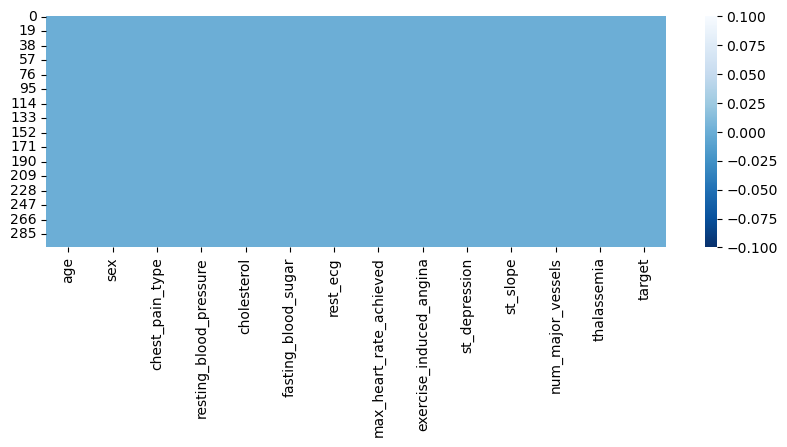

In [32]:
# Check for missing values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

### Explortory Data Analysis

1. Univariate Analysis

In [33]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

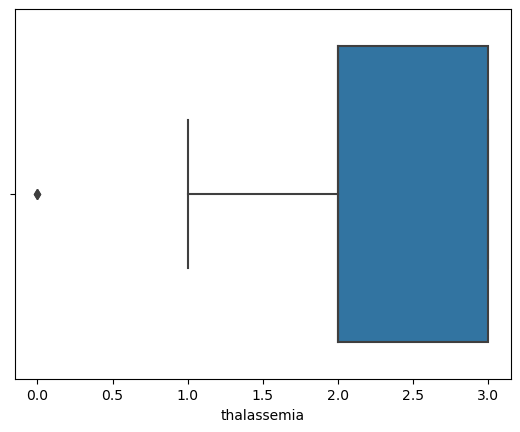

In [34]:
# Check for outliers
sns.boxplot(x=df['thalassemia'])

<Axes: xlabel='cholesterol'>

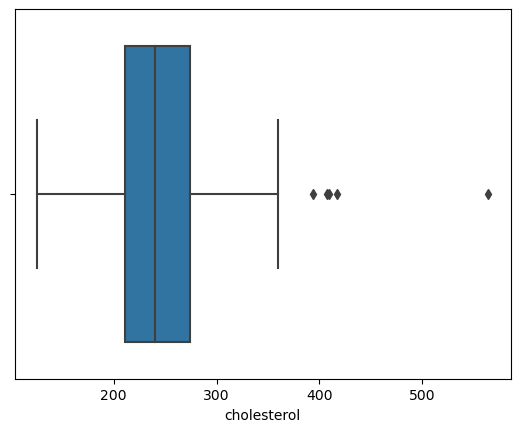

In [35]:
sns.boxplot(x=df['cholesterol'])

<Axes: xlabel='resting_blood_pressure'>

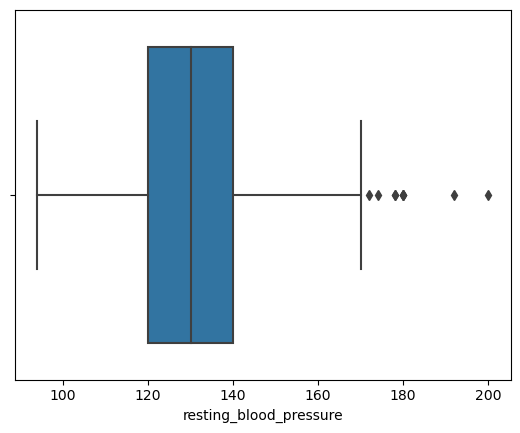

In [36]:
sns.boxplot(x=df['resting_blood_pressure'])

<Axes: xlabel='max_heart_rate_achieved'>

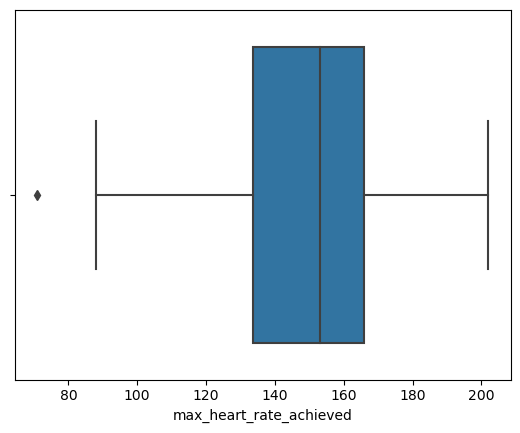

In [38]:
sns.boxplot(x=df['max_heart_rate_achieved'])

Text(0.5, 1.0, 'Total Number of Patients')

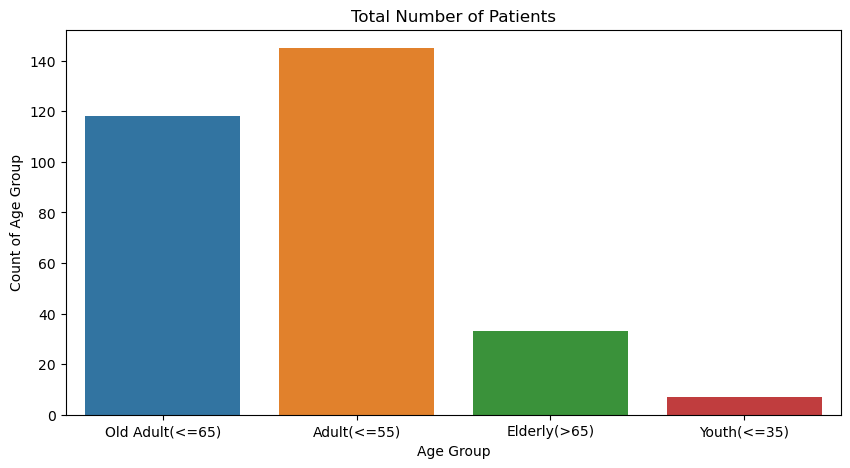

In [39]:
# Data visualization - Age_bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

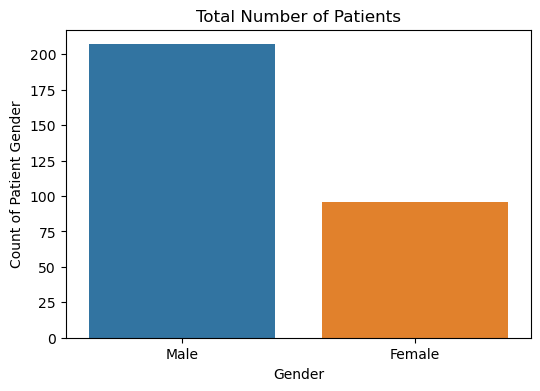

In [44]:
# Data Visualization - Gender
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
df['gender'] = df['sex'].apply(gender)

# Investigating gender details
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')